---
ParticleGun >>> Gen sample for p-p collisions at 13 TeV
---

  |    Ali Bavarchee   |
---
=-=-=-=-=-=-=-=

In [3]:
import ROOT

Welcome to JupyROOT 6.26/10


In [4]:
import pythia8

In [8]:
# Pythia setup
pythia = pythia8.Pythia()
pythia.readString("Beams:idA = 197; Beams:idB = 197;")  # Au ions
#pythia.readString("Higgs:fiducial = 1")  # Enable Higgs production
pythia.readString("Check:beams = off")
pythia.readString("ParticleDecays:limitTau0 = on")  # Decay all unstable particles
pythia.readString("Tune:pp = 2")  # Monash tune for pp collisions (adapt for Au+Au)
pythia.init()

False


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.310      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Jul 2023  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 12 Feb 2024 at 12:27:21    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

In [5]:
from ROOT import TFile, TTree
import sys
import pythia8


In [31]:
def simulate_collisions(output_filename="collision_data.root", n_events=1000):
    # Initialize Pythia with a config suitable for heavy-ion collisions
    pythia = pythia8.Pythia()
    pythia.readString("Beams:idA = 1000822080; Beams:idB = 1000822080")  # Lead ions for example
    pythia.readString("Beams:eCM = 13000.")  # Center-of-mass energy in GeV
    pythia.init()
    
    # Create a ROOT file and a tree to store the data
    root_file = TFile(output_filename, "RECREATE")
    tree = TTree("collision_data", "Data from simulated collisions")
    
    # Define variables to hold data and branches in the tree
    n_particles = ROOT.std.vector('int')()
    particle_px = ROOT.std.vector('float')()
    particle_py = ROOT.std.vector('float')()
    particle_pz = ROOT.std.vector('float')()
    particle_pT = ROOT.std.vector('float')()
    tree.Branch("n_particles", n_particles)
    tree.Branch("particle_px", particle_px)
    tree.Branch("particle_py", particle_py)
    tree.Branch("particle_pz", particle_pz)
    tree.Branch("particle_pT", particle_pT)
    
    # Event loop
    for i_event in range(n_events):
        if not pythia.next(): continue
        
        # Reset vectors for the current event
        n_particles.clear()
        particle_px.clear()
        particle_py.clear()
        particle_pz.clear()
        particle_pT.clear()
        # Loop over particles in the event
        for i in range(pythia.event.size()):
            particle = pythia.event[i]
            if particle.isFinal():
                n_particles.push_back(1)  # Count this particle
                particle_px.push_back(particle.px())
                particle_py.push_back(particle.py())
                particle_pz.push_back(particle.pz())
                particle_pT.push_back(particle.pT())
        # Fill the tree for this event
        tree.Fill()
    
    # Write the tree to the file and close it
    tree.Write()
    root_file.Close()
    
    # Statistics
    pythia.stat()

if __name__ == "__main__":
    simulate_collisions()



 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.310      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Jul 2023  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 12 Feb 2024 at 13:53:51    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

In [33]:
# Get the tree from the file
tree = f.Get("collision_data")

In [43]:
# Set up a canvas
c = ROOT.TCanvas("c2", "Particle Momenta2", 800, 600)

In [44]:
!ls

collision_data.root  testali001.ipynb


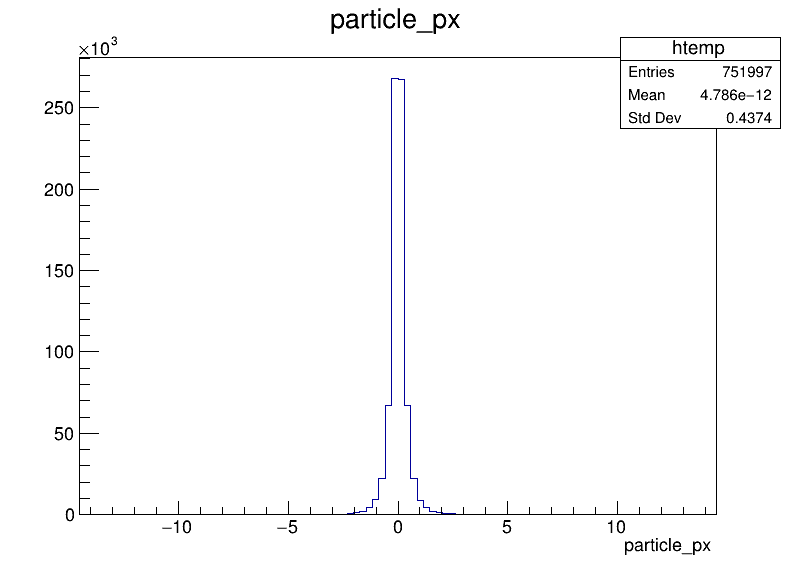

In [45]:
# Draw a histogram of particle px
tree.Draw("particle_px")
c.Draw()

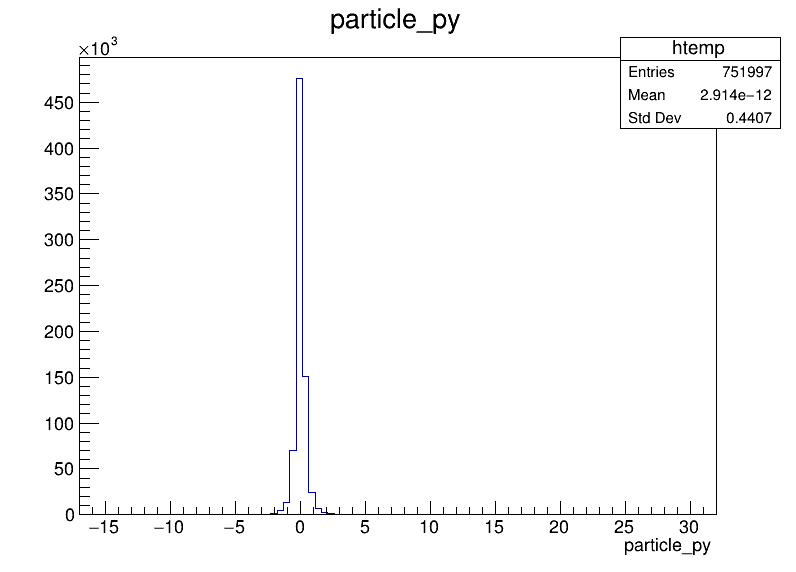

In [46]:
# Draw a histogram of particle py
tree.Draw("particle_py")
# Show the canvas
c.Draw()


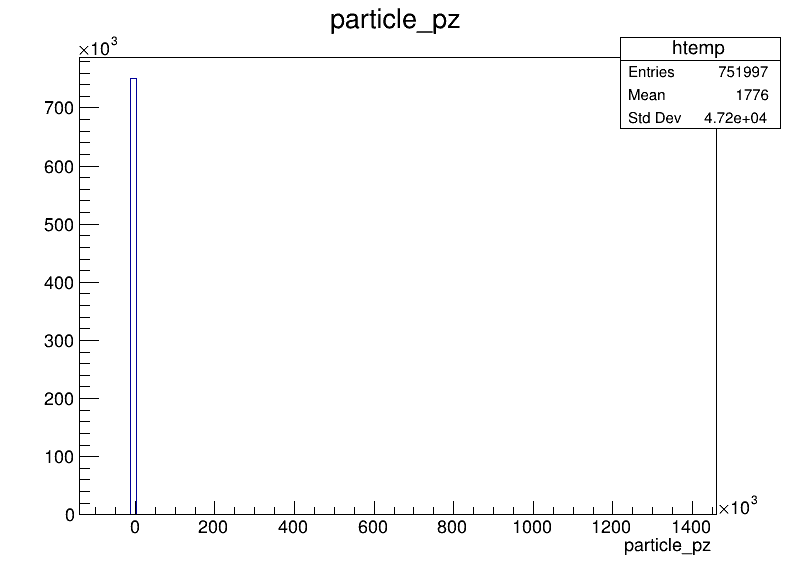

In [47]:
# Draw a histogram of particle pz
tree.Draw("particle_pz")
c.Draw()

In [1]:
'''
# Open the ROOT file
file = ROOT.TFile("collision_data.root", "READ")

# Get the tree from the file
tree = file.Get("jets")  # Adjust the tree name if it's different

# Check if the tree exists
if not tree:
    print("Tree 'jets' not found")
    file.Close()
    exit()

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Jet pT Distribution", 800, 600)

# Create a histogram to fill with jet pT values
hist_jet_pt = ROOT.TH1F("hist_jet_pt", "Jet pT Distribution;Jet pT (GeV/c);Entries", 100, 0, 200)

# Draw jet pT from the tree to the histogram
tree.Draw("jet_pt>>hist_jet_pt")

# Set drawing options and update the canvas to show the histogram
hist_jet_pt.SetLineColor(ROOT.kBlue)
hist_jet_pt.SetLineWidth(2)
hist_jet_pt.Draw()
canvas.Update()

canvas.SaveAs("jet_pt_distribution.png")


file.Close()
'''

'\n# Open the ROOT file\nfile = ROOT.TFile("collision_data.root", "READ")\n\n# Get the tree from the file\ntree = file.Get("jets")  # Adjust the tree name if it\'s different\n\n# Check if the tree exists\nif not tree:\n    print("Tree \'jets\' not found")\n    file.Close()\n    exit()\n\n# Create a canvas\ncanvas = ROOT.TCanvas("canvas", "Jet pT Distribution", 800, 600)\n\n# Create a histogram to fill with jet pT values\nhist_jet_pt = ROOT.TH1F("hist_jet_pt", "Jet pT Distribution;Jet pT (GeV/c);Entries", 100, 0, 200)\n\n# Draw jet pT from the tree to the histogram\ntree.Draw("jet_pt>>hist_jet_pt")\n\n# Set drawing options and update the canvas to show the histogram\nhist_jet_pt.SetLineColor(ROOT.kBlue)\nhist_jet_pt.SetLineWidth(2)\nhist_jet_pt.Draw()\ncanvas.Update()\n\ncanvas.SaveAs("jet_pt_distribution.png")\n\n\nfile.Close()\n'

In [6]:
import fastjet as fj

In [10]:
def simulate_and_find_jets(output_filename="jets_data.root", n_events=100):
    # Initialize Pythia with a configuration suitable for your study
    pythia = pythia8.Pythia()
    # Setup for gold-gold collisions at high energy is hypothetical here; adjust as necessary
    pythia.readString("HardQCD:all = on")  # Enable hard QCD processes to study jets
    pythia.readString("Beams:eCM = 13000.")
    pythia.init()

    # Create a ROOT file and a tree to store the data
    root_file = TFile(output_filename, "RECREATE")
    tree = TTree("jets", "Data from jet analysis")
    
    # Define variables and branches
    jet_pt = ROOT.std.vector('float')()
    tree.Branch("jet_pt", jet_pt)
    
    # Initialize FastJet and the jet finder
    jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)  # Using the anti-kT algorithm with R=0.4
    
    for i_event in range(n_events):
        if not pythia.next(): continue
        
        # Prepare particles for FastJet
        fj_particles = []
        for i in range(pythia.event.size()):
            part = pythia.event[i]
            if part.isFinal():
                fj_particles.append(fj.PseudoJet(part.px(), part.py(), part.pz(), part.e()))
        
        # Run the jet finder
        cluster_sequence = fj.ClusterSequence(fj_particles, jet_def)
        jets = cluster_sequence.inclusive_jets(ptmin=20)  # Jets with pT > 20 GeV/c
        
        # Reset the jet_pt vector and fill it with the jets' pT
        jet_pt.clear()
        for jet in jets:
            jet_pt.push_back(jet.pt())
        
        # Fill the tree for this event
        tree.Fill()
    
    # Write and close the ROOT file
    tree.Write()
    root_file.Close()
    
    # Statistics
    pythia.stat()

if __name__ == "__main__":
    simulate_and_find_jets()



 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.310      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Jul 2023  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 12 Feb 2024 at 14:03:02    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

In [ ]:
'''
import pythia8
import ROOT
from ROOT import TFile, TTree
import fastjet as fj
import fjcontrib
'''
#import fjcontrib

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


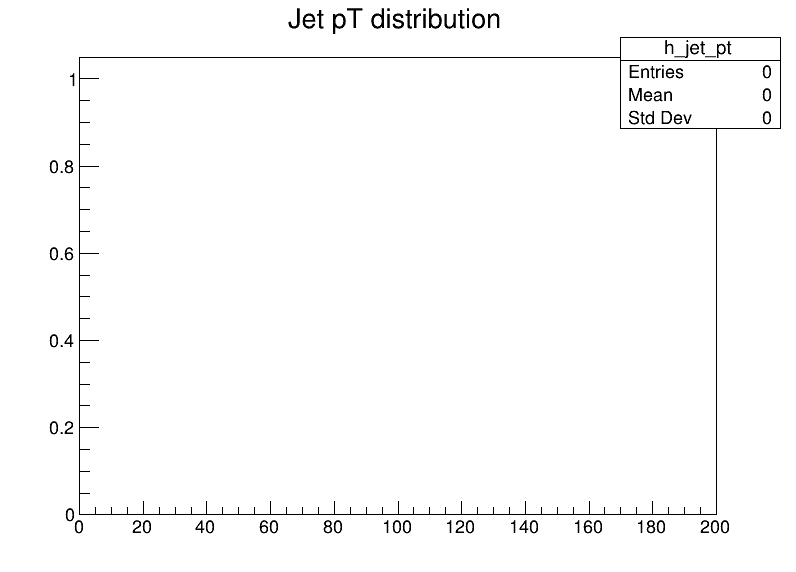

In [9]:
# Open the ROOT file
f = ROOT.TFile("jets_data.root")

# Get the tree from the file
tree = f.Get("jets")

# Create a histogram for jet pT
h_jet_pt = ROOT.TH1F("h_jet_pt", "Jet pT distribution", 100, 0, 200)  # 100 bins from 0 to 200 GeV

# Draw jet pT from the tree to the histogram
tree.Draw("jet_pt>>h_jet_pt")

# Set up a canvas and draw the histogram
c = ROOT.TCanvas("c", "Jet pT", 800, 600)
h_jet_pt.Draw()

# Show the canvas
c.Draw()
